In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/Addis_Ababa_weather_data.csv")
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
10,Addis Ababa,2026-03-03,67.9,55.1,58.8,67.9,55.1,58.8,51.4,77.2,...,15.0,9,10,2026-03-03T06:38:00,2026-03-03T18:36:11,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN
11,Addis Ababa,2026-03-04,69.3,55.8,60.9,69.3,55.8,60.9,50.6,69.9,...,20.5,9,10,2026-03-04T06:37:33,2026-03-04T18:36:13,0.53,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN
12,Addis Ababa,2026-03-05,68.3,56.7,61.5,68.3,56.7,61.5,49.7,65.9,...,14.7,7,10,2026-03-05T06:37:04,2026-03-05T18:36:14,0.56,Overcast,Cloudy skies throughout the day.,cloudy,NaN
13,Addis Ababa,2026-03-06,68.8,54.9,61.4,68.8,54.9,61.4,47.2,60.8,...,16.5,8,10,2026-03-06T06:36:36,2026-03-06T18:36:15,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN
14,Addis Ababa,2026-03-07,67.6,56.9,62.0,67.6,56.9,62.0,45.4,55.2,...,13.8,7,10,2026-03-07T06:36:07,2026-03-07T18:36:16,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN


In [22]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15 non-null     str    
 1   datetime          15 non-null     str    
 2   tempmax           15 non-null     float64
 3   tempmin           15 non-null     float64
 4   temp              15 non-null     float64
 5   feelslikemax      15 non-null     float64
 6   feelslikemin      15 non-null     float64
 7   feelslike         15 non-null     float64
 8   dew               15 non-null     float64
 9   humidity          15 non-null     float64
 10  precip            15 non-null     float64
 11  precipprob        15 non-null     float64
 12  precipcover       15 non-null     float64
 13  preciptype        10 non-null     str    
 14  snow              15 non-null     int64  
 15  snowdepth         15 non-null     int64  
 16  windgust          15 non-null     float64
 17  windspeed 

In [23]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 15
Number of columns: 33


In [24]:
df.duplicated().sum()
df = df.drop_duplicates()

In [25]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.000000
mean,70.880000,56.833333,62.740000,70.880000,56.833333,62.740000,44.200000,54.16000,0.250467,13.340000,...,8.566667,132.380000,1013.980000,84.353333,13.186667,203.766667,17.613333,8.133333,10.0,0.386000
std,4.390444,1.702799,2.670687,4.390444,1.702799,2.670687,6.663332,16.87474,0.356366,11.375588,...,2.533114,32.303078,1.858263,9.112853,2.081849,49.792766,4.305456,1.684665,0.0,0.155967
min,65.400000,54.200000,58.800000,65.400000,54.200000,58.800000,33.900000,31.70000,0.000000,0.000000,...,5.100000,42.900000,1011.300000,63.400000,9.700000,147.500000,12.600000,5.000000,10.0,0.140000
25%,67.750000,55.300000,60.550000,67.750000,55.300000,60.550000,37.550000,35.80000,0.000000,1.600000,...,7.150000,122.550000,1012.650000,82.500000,11.250000,164.550000,14.250000,7.000000,10.0,0.265000
50%,69.300000,56.900000,62.000000,69.300000,56.900000,62.000000,46.000000,55.20000,0.052000,16.100000,...,8.100000,141.000000,1013.700000,86.900000,13.700000,183.000000,15.600000,8.000000,10.0,0.390000
75%,75.500000,58.200000,65.000000,75.500000,58.200000,65.000000,50.250000,69.75000,0.439500,21.000000,...,9.350000,149.200000,1014.950000,88.500000,15.000000,240.550000,20.750000,10.000000,10.0,0.515000
max,78.200000,59.600000,67.100000,78.200000,59.600000,67.100000,51.400000,77.20000,1.130000,32.300000,...,14.300000,175.100000,1018.500000,98.000000,15.000000,291.300000,25.300000,10.000000,10.0,0.620000


In [26]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month,day
0,Addis Ababa,2026-02-21,75.5,55.3,64.3,75.5,55.3,64.3,33.9,33.4,...,2026-02-21T06:42:05,2026-02-21T18:35:28,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HAAB,remote",2026,2,21
1,Addis Ababa,2026-02-22,76.9,58.0,65.9,76.9,58.0,65.9,35.1,32.7,...,2026-02-22T06:41:44,2026-02-22T18:35:35,0.17,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN,2026,2,22
2,Addis Ababa,2026-02-23,76.4,58.6,66.2,76.4,58.6,66.2,34.7,31.7,...,2026-02-23T06:41:21,2026-02-23T18:35:41,0.21,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN,2026,2,23
3,Addis Ababa,2026-02-24,78.2,59.6,67.1,78.2,59.6,67.1,36.4,33.0,...,2026-02-24T06:40:58,2026-02-24T18:35:46,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN,2026,2,24
4,Addis Ababa,2026-02-25,75.5,58.4,65.6,75.5,58.4,65.6,38.7,38.2,...,2026-02-25T06:40:35,2026-02-25T18:35:51,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN,2026,2,25


In [27]:
df.isnull().sum()

name                 0
datetime             0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           5
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
severerisk           0
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
stations            14
year                 0
month                0
day                  0
dtype: int64

In [30]:
# fillna, dropna, interpolation, forward fill, backward fill, mean/median/mode imputation
df['stations'] = df['stations'].fillna(df['stations'].mode()[0])
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month,day
0,Addis Ababa,2026-02-21,75.5,55.3,64.3,75.5,55.3,64.3,33.9,33.4,...,2026-02-21T06:42:05,2026-02-21T18:35:28,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HAAB,remote",2026,2,21
1,Addis Ababa,2026-02-22,76.9,58.0,65.9,76.9,58.0,65.9,35.1,32.7,...,2026-02-22T06:41:44,2026-02-22T18:35:35,0.17,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HAAB,remote",2026,2,22
2,Addis Ababa,2026-02-23,76.4,58.6,66.2,76.4,58.6,66.2,34.7,31.7,...,2026-02-23T06:41:21,2026-02-23T18:35:41,0.21,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HAAB,remote",2026,2,23
3,Addis Ababa,2026-02-24,78.2,59.6,67.1,78.2,59.6,67.1,36.4,33.0,...,2026-02-24T06:40:58,2026-02-24T18:35:46,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HAAB,remote",2026,2,24
4,Addis Ababa,2026-02-25,75.5,58.4,65.6,75.5,58.4,65.6,38.7,38.2,...,2026-02-25T06:40:35,2026-02-25T18:35:51,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HAAB,remote",2026,2,25


In [31]:
df.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          5
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
year                0
month               0
day                 0
dtype: int64

In [35]:
df['preciptype'] = df['preciptype'].fillna(df['preciptype'].mode()[0])
df.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
year                0
month               0
day                 0
dtype: int64

In [37]:
Q1 = df["temp"].quantile(0.25)
Q3 = df["temp"].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["temp"] < lower) | (df["temp"] > upper)]
df = df[(df["temp"] >= lower) & (df["temp"] <= upper)]

df.shape

(15, 36)

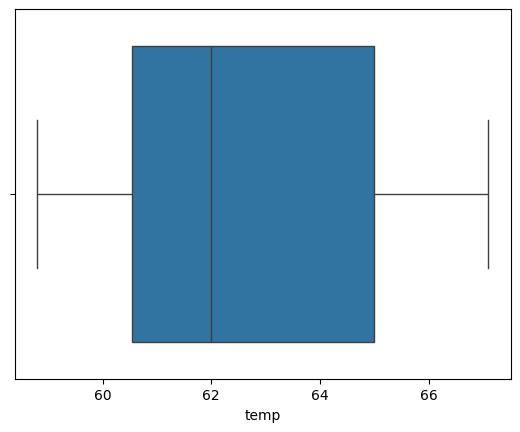

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["temp"])
plt.show()

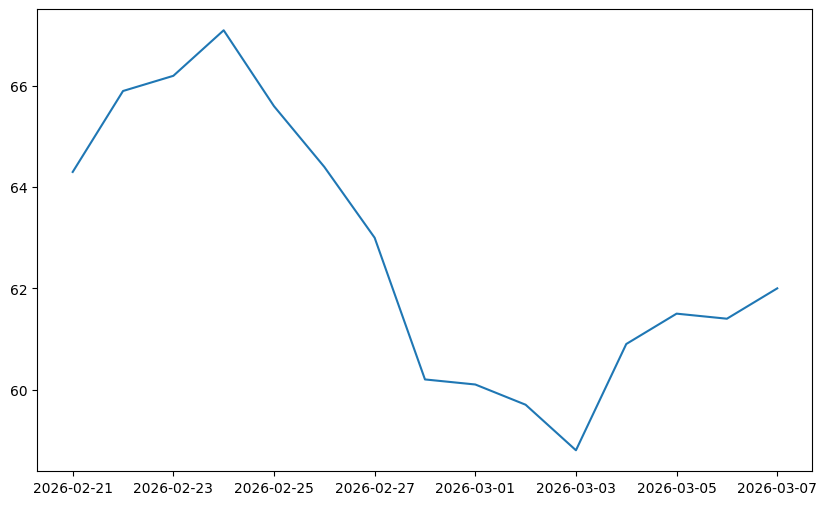

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df["datetime"], df["temp"])
plt.show()

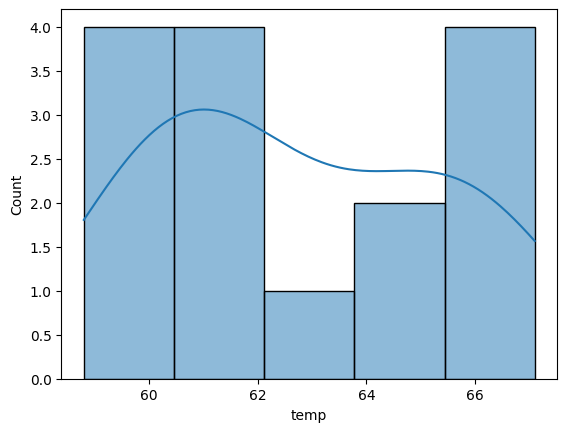

In [41]:
sns.histplot(df["temp"], kde=True)
plt.show()

<Axes: >

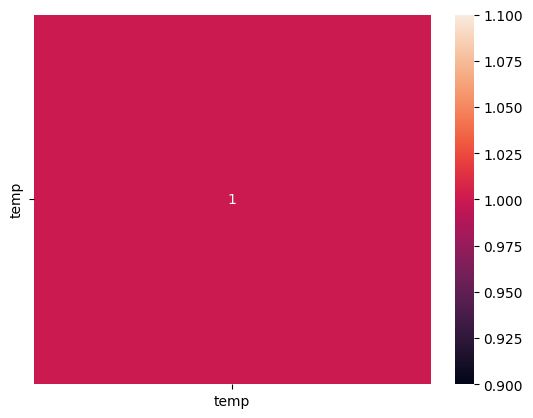

In [42]:
sns.heatmap(df[["temp"]].corr(), annot=True)

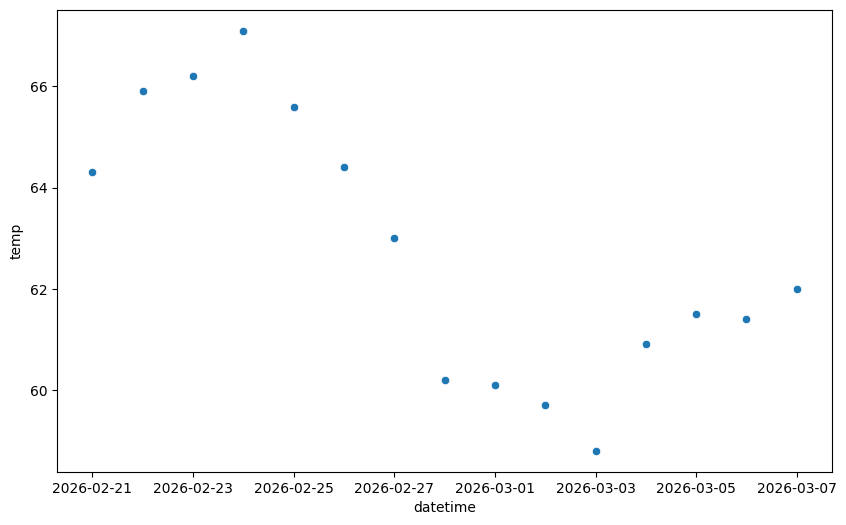

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["datetime"], y=df["temp"])
plt.show()

In [46]:
df.describe()
df["temp"].value_counts()

temp
64.3    1
65.9    1
66.2    1
67.1    1
65.6    1
64.4    1
63.0    1
60.2    1
60.1    1
59.7    1
58.8    1
60.9    1
61.5    1
61.4    1
62.0    1
Name: count, dtype: int64